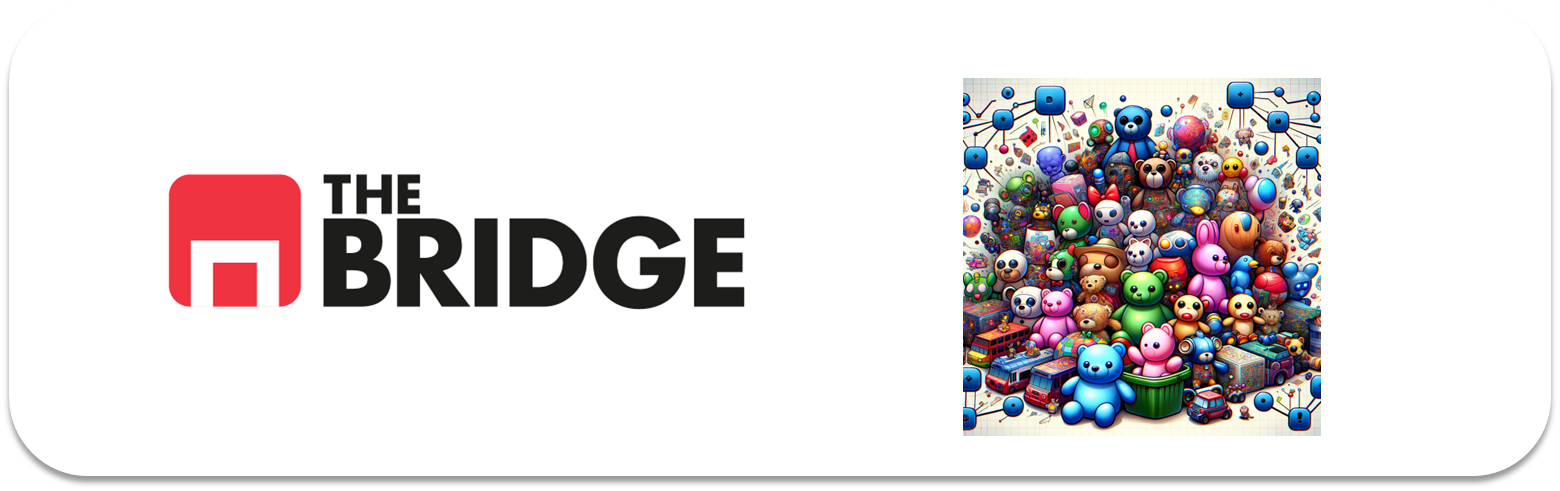

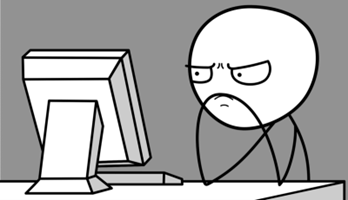

## PRACTICA OBLIGATORIA: K-MEANS

* La práctica obligatoria de esta unidad consiste en un ejercicio de modelado no supervisado sobre imágenes para practicar con el algoritmo k-means. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.preprocessing import MinMaxScaler

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## **#1**

Vamos a trabajar con un dataset también entre los "clásicos" (aunque a veces menos conocido) que es el de rostros Olivetti. Este dataset contiene 400 imágenes en escala de grises de 64 × 64 píxeles de rostros.   


Como en otros datasets de imágenes, estás están "aplanadas" de forma que cada pixel es una feature y por cada imagen hay $64\times 64 = 4096$ features.  

Se fotografiaron 40 personas diferentes (10 veces cada una) y esas fotografías se recogen en el dataset.  

La tarea habitual es entrenar un modelo que pueda predecir qué persona está representada en cada imagen, pero nosotros lo vamos a hacer de forma no supervisada. 



### #1.1


Carga el conjunto de datos usando la función `sklearn.datasets.fetch_olivetti_faces()`. Recuerda que se carga un "diccionario". Muestra su descripción acudiendo a la clave "DESCR".

In [7]:
from sklearn.datasets import fetch_olivetti_faces
df = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\enrik\scikit_learn_data


In [11]:
df.DESCR

'.. _olivetti_faces_dataset:\n\nThe Olivetti faces dataset\n--------------------------\n\n`This dataset contains a set of face images`_ taken between April 1992 and \nApril 1994 at AT&T Laboratories Cambridge. The\n:func:`sklearn.datasets.fetch_olivetti_faces` function is the data\nfetching / caching function that downloads the data\narchive from AT&T.\n\n.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html\n\nAs described on the original website:\n\n    There are ten different images of each of 40 distinct subjects. For some\n    subjects, the images were taken at different times, varying the lighting,\n    facial expressions (open / closed eyes, smiling / not smiling) and facial\n    details (glasses / no glasses). All the images were taken against a dark\n    homogeneous background with the subjects in an upright, frontal position \n    (with tolerance for some side movement).\n\n**Data Set Characteristics:**\n\n    =================   ============

### #1.2 

Aunque no lo vas a usar hasta el final de la práctica, muestra el target. Luego cargalo todo en un mismo dataframe (tendrás que añadir el target) y obtén otro dataset con todas las imagenes reordenadas aleatoriamente (emplea por ejemplo el método `sample` del dataframe o el método que tú quieras)

In [47]:
df = fetch_olivetti_faces()

# Acceder a las imágenes y las etiquetas
imagenes = df.images
target = df.target

In [53]:
df_img = pd.DataFrame([imagen.ravel() for imagen in imagenes])

# Agregar la columna de etiquetas al DataFrame
df_img['target'] = etiquetas

# Mostrar las primeras filas del DataFrame
print(df_img.head())

          0         1         2         3         4         5         6  \
0  0.309917  0.367769  0.417355  0.442149  0.528926  0.607438  0.657025   
1  0.454545  0.471074  0.512397  0.557851  0.595041  0.640496  0.681818   
2  0.318182  0.400826  0.491736  0.528926  0.586777  0.657025  0.681818   
3  0.198347  0.194215  0.194215  0.194215  0.190083  0.190083  0.243802   
4  0.500000  0.545455  0.582645  0.623967  0.648760  0.690083  0.694215   

          7         8         9  ...      4087      4088      4089      4090  \
0  0.677686  0.690083  0.685950  ...  0.669421  0.652893  0.661157  0.475207   
1  0.702479  0.710744  0.702479  ...  0.157025  0.136364  0.148760  0.152893   
2  0.685950  0.702479  0.698347  ...  0.132231  0.181818  0.136364  0.128099   
3  0.404959  0.483471  0.516529  ...  0.636364  0.657025  0.685950  0.727273   
4  0.714876  0.723140  0.731405  ...  0.161157  0.177686  0.173554  0.177686   

       4091      4092      4093      4094      4095  target  
0  0.1

In [63]:
df_img

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,target
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,...,0.669421,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025,0
1,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,...,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893,0
2,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893,0
3,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,0.516529,...,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669,0
4,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,0.731405,...,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.400826,0.495868,0.570248,0.632231,0.648760,0.640496,0.661157,0.636364,0.665289,0.698347,...,0.396694,0.264463,0.099174,0.181818,0.243802,0.247934,0.161157,0.157025,0.136364,39
396,0.367769,0.367769,0.351240,0.301653,0.247934,0.247934,0.367769,0.512397,0.574380,0.628099,...,0.334711,0.289256,0.285124,0.338843,0.404959,0.458678,0.487603,0.512397,0.549587,39
397,0.500000,0.533058,0.607438,0.628099,0.657025,0.632231,0.657025,0.669421,0.673554,0.702479,...,0.148760,0.152893,0.161157,0.161157,0.173554,0.157025,0.177686,0.148760,0.190083,39
398,0.214876,0.219008,0.219008,0.223140,0.210744,0.202479,0.276859,0.400826,0.487603,0.549587,...,0.392562,0.367769,0.409091,0.479339,0.524793,0.545455,0.574380,0.590909,0.603306,39


In [62]:
df_img.describe()

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,target
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.400134,0.434236,0.476281,0.518481,0.554845,0.588729,0.621426,0.647510,0.664814,0.676591,...,0.367221,0.363027,0.355506,0.340196,0.338657,0.335909,0.321415,0.313647,0.310455,19.500000
std,0.180695,0.189504,0.194742,0.193313,0.188593,0.178481,0.167109,0.155024,0.147616,0.143583,...,0.181861,0.181611,0.188709,0.186088,0.189256,0.195280,0.187842,0.183616,0.180635,11.557853
min,0.086777,0.066116,0.090909,0.041322,0.107438,0.107438,0.115702,0.115702,0.119835,0.140496,...,0.037190,0.053719,0.049587,0.033058,0.012397,0.049587,0.057851,0.061983,0.033058,0.000000
25%,0.243802,0.267562,0.314050,0.383264,0.446281,0.515496,0.544421,0.581612,0.599174,0.611570,...,0.214876,0.219008,0.197314,0.177686,0.177686,0.173554,0.173554,0.173554,0.172521,9.750000
50%,0.392562,0.458678,0.512397,0.545455,0.584711,0.615702,0.652893,0.669421,0.683884,0.702479,...,0.367769,0.342975,0.334711,0.320248,0.314050,0.299587,0.289256,0.270661,0.272727,19.500000
75%,0.528926,0.575413,0.636364,0.666322,0.702479,0.714876,0.735537,0.757231,0.772727,0.780992,...,0.496901,0.500000,0.500000,0.479339,0.462810,0.462810,0.446281,0.414256,0.417355,29.250000
max,0.805785,0.822314,0.871901,0.892562,0.871901,0.871901,0.871901,0.871901,0.871901,0.871901,...,0.904959,0.888430,0.896694,0.826446,0.863636,0.921488,0.929752,0.884298,0.822314,39.000000


### No tiene que ver, pero inbvestigando saqué esto por curiosidad

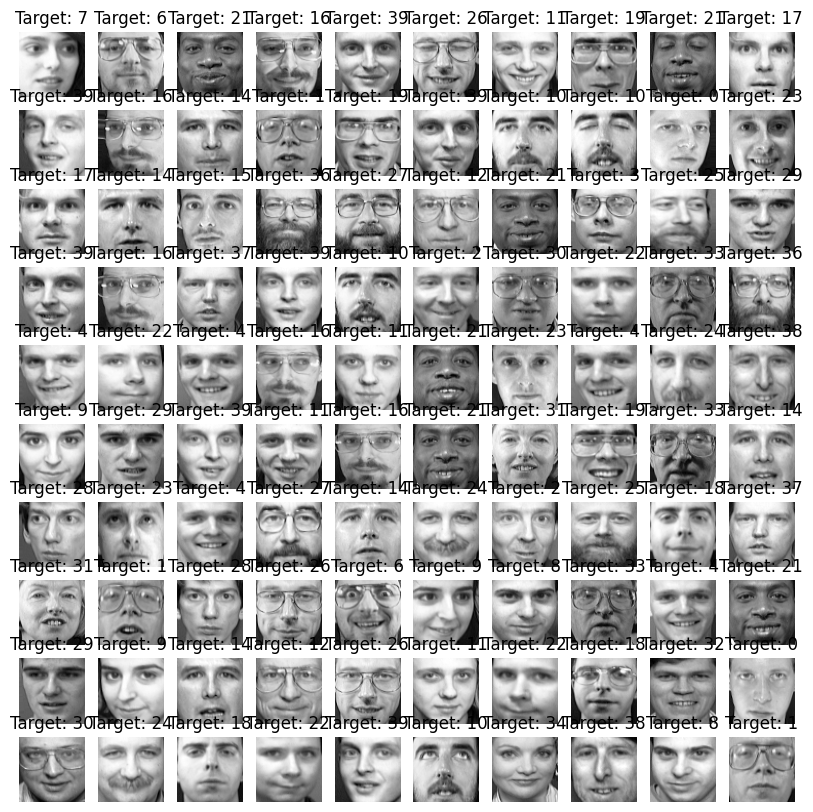

In [71]:


# Número de imágenes por fila y columna
num_filas = 10
num_columnas = 10

# Obtener las imágenes y etiquetas
imagenes = df_img.drop(columns='target').values
etiquetas = df_img['target'].values

# Obtener índices aleatorios
indices_aleatorios = np.random.choice(len(imagenes), num_filas * num_columnas, replace=False)

# Crear la cuadrícula de imágenes
fig, axs = plt.subplots(num_filas, num_columnas, figsize=(10, 10))

# Llenar la cuadrícula con las imágenes
for i, ax in enumerate(axs.flat):
    indice = indices_aleatorios[i]
    imagen = imagenes[indice].reshape(64, 64)  # Asumiendo que las imágenes son de 64x64 píxeles
    ax.imshow(imagen, cmap='gray')
    ax.set_title(f'Target: {etiquetas[indice]}')
    ax.axis('off')

plt.show()

### #1.3

Vamos a dividir en train y test, pero OJO RECUERDA QUE EN LOS PROBLEMAS NO SUPERVISADOS NO HAY SPLIT (porque no hay target), aquí lo hacemos para poder comparar posteriormente el clustering con la clasificación (ya que es uan práctica formativa).

Por tanto, divídelo en un conjunto de entrenamiento, un conjunto de validación y un conjunto de pruebas (80-10-10). Dado que el conjunto de datos es bastante pequeño, emplea un muestreo estratificado para asegurarse de que haya el mismo número de imágenes por persona en cada conjunto (estratificando por la columna que contenga el target)

NOTA: No hemos hecho hasta ahora la separación en tres sets, investiga por tu cuenta o bien haz primero un split 90-10 y luego otro split 89-11 sobre el de 80 (para que de los números aproximados), por ejemplo.

In [65]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
train_set, test_set = train_test_split(df_img, test_size= 0.2, random_state= 42)

In [66]:
# División en entrenamiento (80%) y temporal (20%)
temp_set, test_set = train_test_split(df_img, test_size=0.2, random_state=42, stratify=df_img['target'])

# División temporal en conjunto de validación (50%) y conjunto de entrenamiento final (50%)
train_set, val_set = train_test_split(temp_set, test_size=0.5, random_state=42, stratify=temp_set['target'])

### #1.4

Crea los pares X,y para train, validation y test.

In [68]:
#  Train
X_train, y_train = train_set.drop('target', axis=1), train_set['target']

#  validation
X_val, y_val = val_set.drop('target', axis=1), val_set['target']

# Test
X_test, y_test = test_set.drop('target', axis=1), test_set['target']


Utiliza la siguiente función para visualizar alguna de las caras (observa que tienes que dar la X y la y, usa iloc en ambos datasets)

In [69]:
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

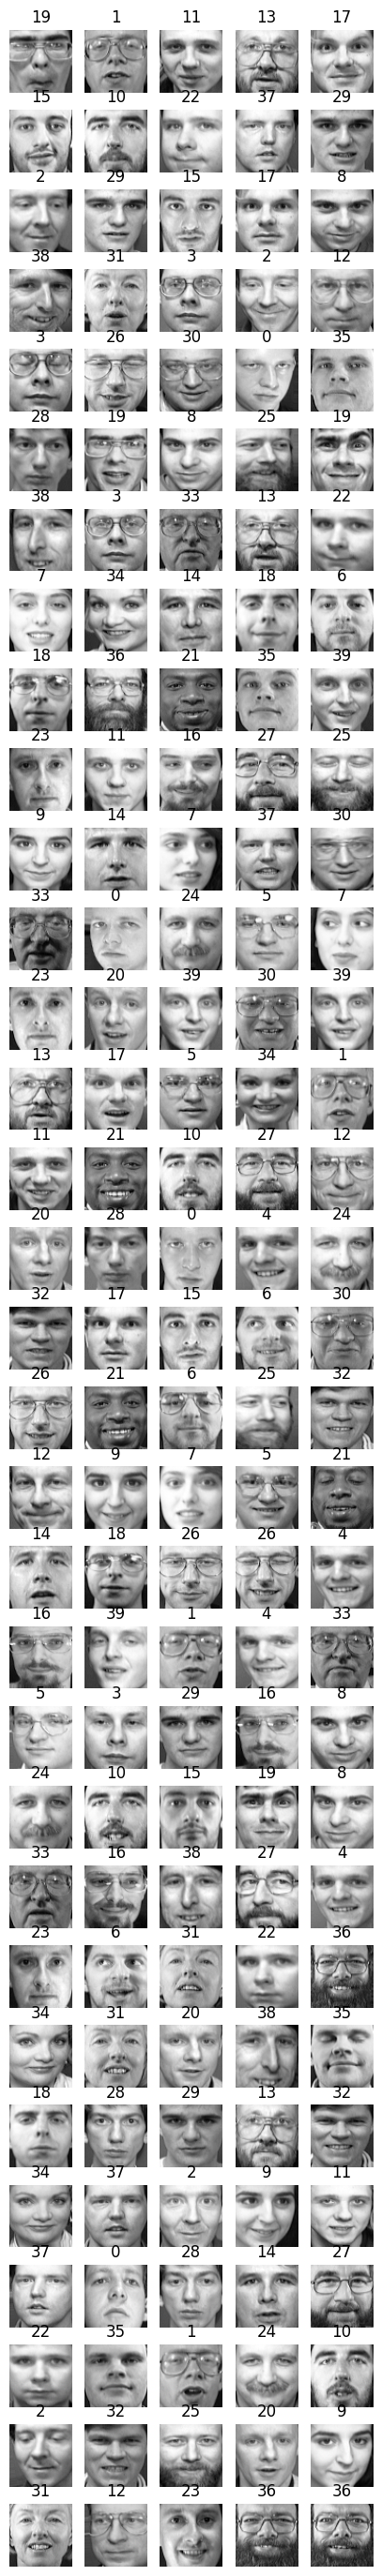

In [70]:
plot_faces(X_train.values, y_train.iloc[:].values)

### #1.5

Para acelerar las cosas, reduciremos la dimensionalidad de los datos utilizando PCA (técnica que veremos en el siguiente sprint). Modifica la siguiente celda de forma que las X se correspondan con las que has utilizado en el ejercicio anterior.

In [78]:

# Aplicar PCA
from sklearn.decomposition import PCA

pca = PCA(0.99)
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid)
X_test_pca = pca.transform(X_test)

# Obtener el número de componentes principales seleccionados
n_components_selected = pca.n_components_

# Imprimir el número de componentes principales seleccionados
print("Número de componentes principales seleccionados:", n_components_selected)



Número de componentes principales seleccionados: 205


### 1.6

Aquí viene la parte del león. A continuación, agrupa las imágenes utilizando K-Means sobre el dataset de train reducido en el ejercicio anterior. Emplea el método del máximo de score de silueta para obtener el mejor k, probando con K de 5 en 5 hasta 150. ¿Cuál es el k que proporciona el mejor score de silueta? NOTA: Emplea todas las features (no hace falta seleccionar, y ya están escaladas entre 0 y 1)

In [84]:
k = 5 # Lo tenemos que poner nosotros -> hiperparámetro
kmeans = KMeans(n_clusters = k, #instanciamos el nk means en el clusters = k
                random_state =  4,
                n_init = 10) # n_init lo discutiremos más adelante ahora no le prestes mucha atención, hace que repita 10 veces el algoritmo y que se querde con la más importante

y_pred = kmeans.fit_predict(X) # Fit -> Obten centroides, predict -> asigna cluster (de los k posibles)[entrenamiento y predicción
y_pred #nos da el cluster que cree que debería asignarle a cada x en función de esa distancia

array([0, 1, 0, 4, 0, 4, 0, 4, 0, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3,
       3, 3, 4, 3, 4, 4, 3, 3, 3, 1, 4, 0, 1, 4, 0, 4, 1, 1, 3, 3, 3, 3,
       4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 4, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 4, 1, 3, 3, 3, 3, 3, 4, 4, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 4, 4, 4, 1, 4, 4, 3, 4, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 4, 1, 1, 4, 1, 1, 1, 3, 3, 1, 0, 0, 0,
       0, 1, 1, 4, 0, 0, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 0, 0, 4, 3, 0, 0,
       0, 0, 0, 0, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 4, 4, 4, 4, 4,
       4, 2, 2, 2, 2, 3, 3, 3, 4, 4, 3, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 1, 3, 4, 3, 4, 3, 3, 4, 4, 1, 1, 4, 4, 1, 4, 4, 4, 4, 4, 3, 1,
       3, 1, 3, 1, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 4, 2, 2, 2, 2, 4, 4,
       4, 4, 2, 2, 3, 2, 3, 2, 2, 3, 2, 2, 3, 3, 3,

In [87]:
silhouette_score(X, kmeans.labels_)


0.20130855

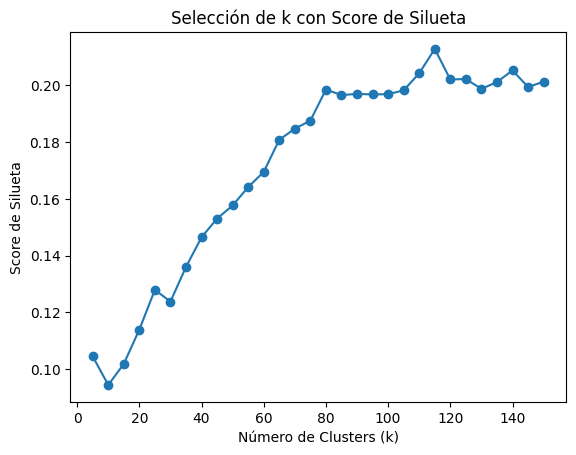

El mejor valor de k es: 115


In [90]:
X = df_img.drop('target', axis=1)

# Inicializa listas para almacenar los resultados
k_values = []
silhouette_scores = []

for k in range(5, 151, 5): #valores 5 en 5 150
    # Crea y ajusta el modelo K-Means
    kmeans = KMeans(n_clusters=k, random_state=42, n_init = 10)
    y_pred = kmeans.fit_predict(X)
    
    # Obtiene las etiquetas de los clusters
    labels = kmeans.labels_
    
    # Calcula el score de silueta
    silhouette_avg = silhouette_score(X,labels)
    
    # Almacena los resultados
    k_values.append(k)
    silhouette_scores.append(silhouette_avg)

# Encuentra el valor de k que proporciona el mejor score de silueta
best_k = k_values[silhouette_scores.index(max(silhouette_scores))]

# Visualiza los resultados
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Score de Silueta')
plt.title('Selección de k con Score de Silueta')
plt.show()

print(f"El mejor valor de k es: {best_k}")


### #1.7

Repite el ejercio anterior empleando ahora el método del codo de Inercia. ¿Sale algo más concluyente o que refuerce el anterior resultado?

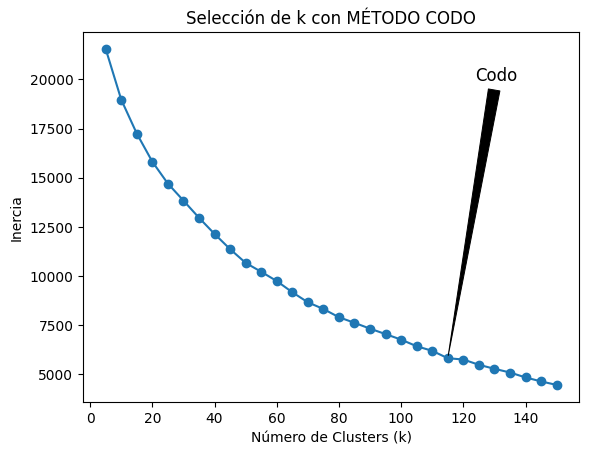

In [99]:
# Inicializa listas para almacenar los resultados
k_values = []
inertia_values = []

for k in range(5, 151, 5): # valores 5 en 5 hasta 150
    # Crea y ajusta el modelo K-Means
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    y_pred = kmeans.fit_predict(X)

    # Calcula la inercia
    inertia = kmeans.inertia_
    
    # Almacena los resultados
    k_values.append(k)
    inertia_values.append(inertia)

# Visualiza los resultados
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Selección de k con MÉTODO CODO')
plt.annotate('Codo',
             xy=(115, inertia_values[22]),
             xytext=(20, 200),  # Ajusta las coordenadas según tu gráfico
             textcoords='offset points',
             fontsize=12,
             arrowprops=dict(facecolor='black', arrowstyle='wedge,tail_width=0.7', lw=0.7)
)
plt.show()
#no hay codo


### #1.8

Quédate con el k obtenido con el método del score de silueta y asigna el modelo con ese k a una variable `best_model`

In [98]:
from sklearn.cluster import KMeans

# Supongamos que best_k es el valor óptimo encontrado con el método del score de silueta
best_k = 10  # Reemplaza con el valor óptimo que hayas obtenido

# Crea y ajusta el modelo K-Means con el mejor k
best_model = KMeans(n_clusters=best_k, random_state=42)
best_model.fit(X)  # Asegúrate de que X sea tu conjunto de datos sin la columna de etiquetas

# El modelo ajustado con el mejor k está ahora en best_model


KMeans(n_clusters=10, random_state=42)

### #1.9

Haz una valoración del método de clustering para el K elegido. Para ello crea un programa que recorra la lista de etiquetas dadas por "best_model" y que, haciendo uso de la función que ya te hemos proporcionado, pinte las caras asignadas a los 10 primeros clústeres. Ojo tendrás que hacer una pequeña adaptación porque las features de entrenamiento no son las features reales (son una "transformación" de estas) y si pasas el X de entrenamiento no verás nada. ¿Ves caras similares?

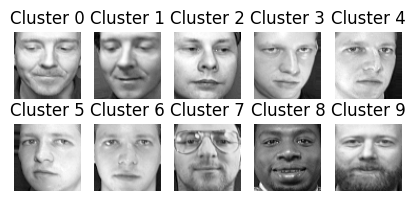

In [101]:


# Seleccion de caras
selected_faces = []
selected_labels = []
cluster_count = 10  # Clusters a mostrar

for cluster_label in range(cluster_count):
    cluster_indices = np.where(best_model.labels_ == cluster_label)[0]
    # 1 cara por cada clúster 
    if len(cluster_indices) > 0:
        selected_index = cluster_indices[0]
        selected_faces.append(X.iloc[selected_index].values.reshape(64, 64))
        selected_labels.append(f'Cluster {cluster_label}')

# Utiliza la función de plot_faces para visualizar las caras
plot_faces(np.array(selected_faces), selected_labels)

## **#2**


### #2.1


Continuando con el conjunto de datos de caras Olivetti, entrena un clasificador para predecir qué persona está representada en cada imagen, y evalúalo en el conjunto de validación. Utiliza un RandomForest con 150 submodelos o estimadores (y el resto de hiperparámetros déjalos a su valor por defecto)

In [104]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

# RandomForest
random_forest = RandomForestClassifier(n_estimators=150, random_state=42)
random_forest.fit(X_train, y_train)

# Predicciones
y_pred = random_forest.predict(X_valid)

# precisión (accuracy) 
accuracy = accuracy_score(y_valid, y_pred)
print(f'Precisión en el conjunto de validación: {accuracy:.2f}')

Precisión en el conjunto de validación: 0.91


### #2.2

Utiliza K-Means como una herramienta de reducción de dimensionalidad y entrena un clasificador en el conjunto reducido. Para ello emplea el método transform de manera que ahora las features de entrada sean las distancias de cada punto a los centroides del modelo "best_model" de la parte anterior. Por ejemplo:
```python
X_train_reduced = best_model.transform(X_train_pca) 
```


Ojo lo tienes que aplicar a todos los datasets. Luego vuelve a entrenar un RandomForest sobre este dataset y evalualo contra el dataset de validacion.

In [107]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


#Entrenamiento y validación
X_train, X_valid, y_train, y_valid = train_test_split(data.drop('target', axis=1), data['target'], test_size=0.2, random_state=42)

#  entrena el modelo K-Means
best_model = KMeans(n_clusters=115, random_state=42, n_init=10)
best_model.fit(X_train)  # Asegúrate de ajustar el modelo

# transformación a los conjuntos de entrenamiento y validación
X_train_distances = best_model.transform(X_train)
X_valid_distances = best_model.transform(X_valid)

# Inicializa y entrena  RandomForest
random_forest_reduced = RandomForestClassifier(n_estimators=150, random_state=42)
random_forest_reduced.fit(X_train_distances, y_train)

# Realiza predicciones 
y_pred_reduced = random_forest_reduced.predict(X_valid_distances)

# Calcula la precisión (accuracy)
accuracy_reduced = accuracy_score(y_valid, y_pred_reduced)
print(f'Precisión en el conjunto de validación con dimensionalidad reducida: {accuracy_reduced:.2f}')




Precisión en el conjunto de validación con dimensionalidad reducida: 0.81
Precisión en el conjunto de validación con dimensionalidad reducida: 0.81


### #2.3 EXTRA VOLUNTARIO

Busca el número de clusters k que generen un algoritmo kmeans que a su vez sus distancias a los centroides sean las features de un clasificador RandomForest y que permita al clasificador obtener el mejor rendimiento: ¿Qué rendimiento puedes alcanzar? (en terminos de Accuracy)